# DATA 9005 Data Analytics & Visualisation: Project 2

---

Brian Higgins - R00239570

----

**NOTE:**

This Notebooko is very similiar to the "Home Computer Notebook". I had to create two so I was able to run multiple models at the same time. You will see code that is commented out that was not run here.

Other code you will see that is unquie to this notebook to be able to run logner epochs using Colab Pro which I paid for but unfortunetly ran out of 500 units of credit in only two days. So not every model has 30 epochs.

I was not able to run longer than this as explained in the report.


# Libraries

In [ ]:
# libraries
import pandas as pd
import numpy as np
from tensorflow import keras 
import random

import os
import glob
import shutil
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import GlobalAveragePooling2D
from keras.models import load_model
from keras.models import Model
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Remove warnings which are not important.
import warnings
warnings.filterwarnings("ignore")

# **Question One:**

## Create a Keras Model with 2D input with a 1D cov operation

In [ ]:
# # Define the input shape and number of filters
# input_shape = (28,28,1) # 28X28 grayscale imnage
# num_filers = 32

# # Create a Keras Model
# model = keras.models.Sequential()

# # Add a 2d input layer with input shape
# model.add(keras.layers.InputLayer(input_shape=input_shape))

# # Print model summary
# model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


**NOTE** Discussed in Report.

##  Create a Keras Model with 3D with a 2D conv

In [ ]:
# # Define the input shape and number of filters
# input_shape = (32,32,32,1) # 32X32X32 grayscale volume
# num_filters = 64

# # Create a Keras Model
# model = keras.models.Sequential()

# # Add a 3d input layer with input shape
# model.add(keras.layers.InputLayer(input_shape=input_shape))

# # Add a 2D convolutional layer
# model.add(keras.layers.Conv2D(filters=num_filters, kernel_size=(3,3), activation="relu"))

# # Print model summary
# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 30, 30, 64)    640       
                                                                 
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________


**NOTE** Discussed in Report.

##  Create a Keras Model with 2D with a 3D conv

In [ ]:
# # Define the input shape and number of filters
# input_shape = (28,28,1) # 28x28 grayscale volume
# num_filters = 32

# # Create a Keras Model
# model = keras.models.Sequential()

# # Add a 2D input layer with input_shape
# model.add(keras.layers.InputLayer(input_shape=input_shape))

# # reshape the input to add in a channel
# model.add(keras.layers.Reshape(target_shape=(28,28,1,1)))
          
# # Add a 3D convolutional layer
# model.add(keras.layers.Conv3D(filters=num_filters, kernel_size=(3,3,1), activation="relu"))
          
# # Print model summary
# model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1, 1)      0         
                                                                 
 conv3d (Conv3D)             (None, 26, 26, 1, 32)     320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


**NOTE** Discussed in Report.

# **Question 2:**

## Run Github Code 

This code splits the images into the Train and Test folders for the Research Paper model.

In [ ]:
# # University Lab 219
# # base_dir = "C:/Users/R00239570/Desktop/NN Project/Data/github/kvasir-dataset-v2"

# # Desktop Cmomputer
# base_dir = "C:/Users/Kolobane/OneDrive/CIT MSc Data Science Modules/DATA9005 Data Analytics and Visualization/Project Two - Neural Networks/Data/github/kvasir-dataset-v2/"


In [ ]:
# # Different class (and folders)
# classes = ['dyed-lifted-polyps',
#            'dyed-resection-margins',
#            'esophagitis','normal-cecum',
#            'normal-pylorus','normal-z-line',
#            'polyps',
#            'ulcerative-colitis']

In [ ]:
# # set seed with last three digits of my University ID
# random.seed(790)

# for cl in classes:

#     img_path = os.path.join(base_dir, cl)
#     images = glob.glob(img_path + '/*.jpg')
#     print("{}: {} Images".format(cl, len(images)))
    
#     random.shuffle(images)
#     train_list, test_list = images[:round(len(images)*0.8)], images[round(len(images)*0.80):]

#     # Move shuffled images into Train, Validation and Test directories
#     for image in train_list:
#         if not os.path.exists(os.path.join(base_dir, 'train', cl)):
#             os.makedirs(os.path.join(base_dir, 'train', cl))
#         shutil.move(image, os.path.join(base_dir, 'train', cl))

#     for image in test_list:
#         if not os.path.exists(os.path.join(base_dir, 'test', cl)):
#             os.makedirs(os.path.join(base_dir, 'test', cl))
#         shutil.move(image, os.path.join(base_dir, 'test', cl))

dyed-lifted-polyps: 0 Images
dyed-resection-margins: 0 Images
esophagitis: 0 Images
normal-cecum: 0 Images
normal-pylorus: 0 Images
normal-z-line: 0 Images
polyps: 0 Images
ulcerative-colitis: 0 Images


Now, have created two Train and Test Folders for the Research Paper Code example to see how it runs. 

---

In [ ]:
# # University Lab 217
# # train_folder = "C:/Users/R00239570/Desktop/NN Project/Data/github/kvasir-dataset-v2/train/"
# # test_folder = "C:/Users/R00239570/Desktop/NN Project/Data/github/kvasir-dataset-v2/test/"

# # Desktop Computer
# train_folder = "C:/Users/Kolobane/OneDrive/CIT MSc Data Science Modules/DATA9005 Data Analytics and Visualization/Project Two - Neural Networks/Data/github/kvasir-dataset-v2/train/"
# test_folder = "C:/Users/Kolobane/OneDrive/CIT MSc Data Science Modules/DATA9005 Data Analytics and Visualization/Project Two - Neural Networks/Data/github/kvasir-dataset-v2/test/"


In [ ]:
train_dataAugmentation = ImageDataGenerator(
  #  rotation_range=180,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.5,0.9),
    # shear_range=45,
    zoom_range=[0.8,1.2],
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    fill_mode='nearest',
    )

In [ ]:
test_dataAugmentation = ImageDataGenerator(rescale=1./255)

In [ ]:
# # Train data
# train_data_generator= train_dataAugmentation.flow_from_directory(train_folder,
#                                                  target_size=(200,200), 
#                                                  color_mode='rgb',
#                                                  batch_size=32,
#                                                  class_mode='categorical',
#                                                  shuffle=True)

# test_data_generator =test_dataAugmentation.flow_from_directory(test_folder,
#                                         target_size=(200,200),
#                                        batch_size=50,
#                                        class_mode='categorical')

##### CREATE THE RESEARCH PAPERS CNN

The below code is a Convolutional Neural Network (CNNN) model taken from the github page for a multi class image classification using Keras API with the TensorFlow backend.

In [ ]:
# # Intializes an instance of "Sequential" class, which is a linear stack of layers.
# model_github=Sequential()

# #################
# # Adds a 2D convolutional layer with 32 filters, a kernel size of 3x3, ReLu activation function, same padding and input shape
# # of (200,200,3) for RGB images.
# model_github.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(200,200,3)))
# model_github.add(BatchNormalization()) # technique to normalise the activations of the previous layer.
# model_github.add(MaxPooling2D(pool_size=(2,2))) # technique used to downsample the feature map produced by the previous layer.

# #################
# # Adds a max pooling layer of pool size 2x2
# model_github.add(Conv2D(64,(3,3),padding='same',activation='relu'))
# model_github.add(BatchNormalization())
# model_github.add(MaxPooling2D(pool_size=(2,2)))

# # Repeat
# model_github.add(Conv2D(64,(3,3),padding='same',activation='relu'))
# model_github.add(BatchNormalization())
# model_github.add(MaxPooling2D(pool_size=(2,2)))

# # Repeat
# model_github.add(Conv2D(128,(3,3),padding='same',activation='relu'))
# model_github.add(BatchNormalization())
# model_github.add(MaxPooling2D(pool_size=(2,2)))

# # Repeat
# model_github.add(Conv2D(128,(3,3),padding='same',activation='relu'))
# model_github.add(BatchNormalization())
# model_github.add(MaxPooling2D(pool_size=(2,2)))

# #Repeat
# model_github.add(Conv2D(256,(3,3),padding='same',activation='relu'))
# model_github.add(BatchNormalization())
# model_github.add(MaxPooling2D(pool_size=(2,2)))

# #################
# # This layer flattens the outut of the last Convolutional layer into a 1d layer.
# model_github.add(Flatten())

# # This layer applies a dropout regularization to the network, randomly dropping 20% of the inputs udring training.
# # helps to prevent overfitting and improve the generalization of the model.
# model_github.add(Dropout(0.2)) 

# # Adds a fully connected dense layer with 1024 units and ReLu Activation.
# # Takes the previous flatted output from the previous layer.
# model_github.add(Dense(1024,activation='relu'))

# # aPply dropout again to further prevent overfitting.
# model_github.add(Dropout(0.2))

# # adds another fully connected dense layer with 512 units and ReLu.
# model_github.add(Dense(512,activation='relu'))

# # This layer adds the output of the network with 8 units, which corresponds to the number of
# # classes in the classification problem. 
# # The activation function used is "softmax", whcih gives class probabilities.
# model_github.add(Dense(8,activation='softmax'))


# #################
# # "loss='categorical_crossentropy'" - specfies the loss function used.
# # crossentropy is commonly used.
# # "optimizer='adam'" - specfies the optimizer to the used during training.
# # Adam is popular in deep learning due to its ability to adjust learning rates.
# # Also works well in a range of problems.
# # "metrics=['accuracy']" - evaluation metric to be used in training and testing.
# model_github.compile(loss='categorical_crossentropy',
#   optimizer='adam',metrics=['accuracy'])

##### EXPLORE THE CNN

The CNN has now been created and we can see a summary of its layers.

In [ ]:
# model_github.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
# history_github = model_github.fit_generator (steps_per_epoch=(train_data_generator.n//train_data_generator.batch_size),
#                                generator=train_data_generator,
#                                validation_data=test_data_generator,
#                                validation_steps=test_data_generator.n//test_data_generator.batch_size,
#                                epochs=20, # CHANGED TO 2 ## 
#                                callbacks = [EarlyStopping(monitor='val_loss', 
#                                                           patience=10),
#                                # ModelCheckpoint(filepath='github_model.h5', monitor='val_loss', save_best_only=True)
#                                ] # Don't want to save their model.
# )

Epoch 1/2
200/200 [==============================] - 243s 1s/step - loss: 0.8626 - accuracy: 0.6128 - val_loss: 5.2214 - val_accuracy: 0.1731
Epoch 2/2
200/200 [==============================] - 239s 1s/step - loss: 0.7518 - accuracy: 0.6463 - val_loss: 1.3757 - val_accuracy: 0.4588


**NOTE:** ONLY 2 Epoch.

This a test only to run their code and so only two epoch is used at this point.

In [ ]:
# # final validation accuracy
# final_val_accuracy = history_github.history["val_accuracy"][-1]
# print(f"Model Github - Final Validaion Accuracy: {final_val_accuracy}")

# best_val_accuracy = max(history_github.history["val_accuracy"])
# print(f"Model Github - Best Validation Accuracy: {best_val_accuracy}")

Model Github - Final Validaion Accuracy: 0.45875000953674316
Model Github - Best Validation Accuracy: 0.45875000953674316


Plots need multiple Epochs to be useful.

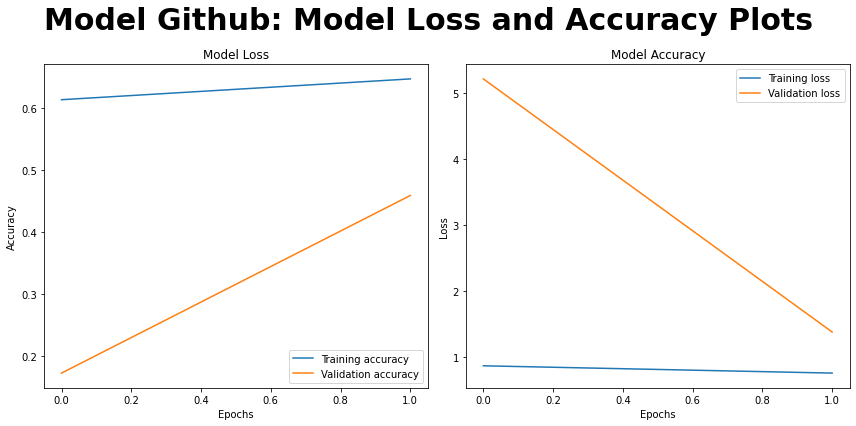

In [ ]:
# # Plot the training history
# plt.figure(figsize=(12,6))

# plt.suptitle("Model Github: Model Loss and Accuracy Plots",
#            fontsize=30, weight="bold" )

# plt.subplot(1,2,1)
# plt.plot(history_github.history["accuracy"], label="Training accuracy")
# plt.plot(history_github.history["val_accuracy"], label="Validation accuracy")
# plt.title("Model Loss")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend()

# plt.subplot(1,2,2)
# plt.plot(history_github.history["loss"], label="Training loss")
# plt.plot(history_github.history["val_loss"], label="Validation loss")
# plt.title("Model Accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend()

# plt.tight_layout()
# plt.show()

**FYI:** I did not run the research papers model with higher Epochs as we already have their results in the paper. 

I wanted to save the Google Colab units for my own models as there is a cost to this. 

In [ ]:
train_dataAugmentation = ImageDataGenerator(
  #  rotation_range=180,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.5,0.9),
    # shear_range=45,
    zoom_range=[0.8,1.2],
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    fill_mode='nearest',
    )

In [ ]:
test_dataAugmentation = ImageDataGenerator(rescale=1./255)

In [ ]:
# # Generators
# train_data_generator= train_dataAugmentation.flow_from_directory(train_folder,
#                                                  target_size=(200,200), 
#                                                  color_mode='rgb',
#                                                  batch_size=32,
#                                                  class_mode='categorical',
#                                                  shuffle=True)

# test_data_generator =test_dataAugmentation.flow_from_directory(test_folder,
#                                         target_size=(200,200),
#                                        batch_size=50,
#                                        class_mode='categorical')

In [ ]:
# this is a dictionary that maps class names to their corresponding integar indices.
# class_indices are useful to mapping the ouput of the model to the corresponding class names.
# train_data_generator.class_indices

In [ ]:
# # output a grid of images with their corresponding labels. 
# class_indices ={0:"dyed-lifted-polyps",1:"dyed-resection-margins",2:"esophagitis",3:"normal-cecum",4:"normal-pylorus",5:"normal-z-line",6:"polyps",7:"ulcerative-colitis"}

# plt.figure(figsize=(10, 10))
# for X_batch, y_batch in train_data_generator:
#   for i in range(9):
#     image=X_batch[i]
#     ax = plt.subplot(3,3, i + 1)
#     plt.imshow(image)
#     plt.title(class_indices[list(y_batch[i]).index(1.0)])
#     plt.axis("off")
#   break

# **Colab Changes to load images into RAM**

In [ ]:
# Load google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set location of images
colab_train_folder = "/content/drive/MyDrive/kvasir-dataset-v2/train/"
colab_val_folder =  "/content/drive/MyDrive/kvasir-dataset-v2/val/"
colab_test_folder = "/content/drive/MyDrive/kvasir-dataset-v2/test"

In [ ]:
# create function to load images to RAM
def load_images(folder, target_size=(200,200)): # set size of images to 200x200
    images= []
    labels =[]
    for root, dirs, files in os.walk(folder):
        for dirname in dirs:
            dir_path = os.path.join(root, dirname)
            for filename in os.listdir(dir_path): 
              file_path =os.path.join(dir_path, filename)
              if os.path.isfile(file_path):
                img = Image.open(file_path)
                img = img.resize(target_size)
                img = np.array(img)
                if img is not None:
                    images.append(img)
                    labels.append(dirname)
    return images, labels

In [ ]:
def one_hot_encode_labels(labels):
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(labels)
    one_hot_labels = to_categorical(encoded_labels)
    return one_hot_labels

In [ ]:
train_images, train_labels = load_images(colab_train_folder, target_size=(200,200))
val_images, val_labels = load_images(colab_val_folder, target_size=(200,200))
test_images, test_labels = load_images(colab_test_folder, target_size=(200,200))

In [ ]:
print(len(train_images)); print(len(val_images)); print(len(test_images))

5600
1200
1200


In [ ]:
train_one_hot_labels = one_hot_encode_labels(train_labels)
val_one_hot_labels = one_hot_encode_labels(val_labels)
test_one_hot_labels = one_hot_encode_labels(test_labels)

In [ ]:
# create new generators to access the new lists instead.
train_data_generator = train_dataAugmentation.flow(
    np.array(train_images),
    train_one_hot_labels,
    batch_size=32,
    shuffle=True)

validation_data_generator = test_dataAugmentation.flow(
    np.array(val_images),
    val_one_hot_labels,
    batch_size=32)

test_data_generator = test_dataAugmentation.flow(
    np.array(test_images),
    test_one_hot_labels,
    batch_size=50)

# **Split the dataset random into train/validation/test 70:15:15 using set seed with the last 3 digits of your student number.**

The Github code only has a Train and Test so updated the code to have Train, Validation and Test folders.

In [ ]:
# # NOTE: CHOOSE FOLDER

# # Location of saved files # UPDATE THIS
# #base_dir = "/Data/kvasir-dataset-v2/"

# # Desktop PC:
# base_dir = "C:/Users/Kolobane/OneDrive/CIT MSc Data Science Modules/DATA9005 Data Analytics and Visualization/Project Two - Neural Networks/Data/kvasir-dataset-v2/"

# # Lab 219 Desktop:
# # base_dir = "C:/Users/R00239570/Desktop/NN Project/Data/"


In [ ]:
# # Different class (and folders)
# classes = ['dyed-lifted-polyps',
#            'dyed-resection-margins',
#            'esophagitis','normal-cecum',
#            'normal-pylorus','normal-z-line',
#            'polyps',
#            'ulcerative-colitis']

**NOTE**: The below code only needs to be run once to divide the images into the three datasets.

In [ ]:
# # set seed with last three digits of my University ID
# random.seed(790)

# for cl in classes:

#     img_path = os.path.join(base_dir, cl)
#     images = glob.glob(img_path + '/*.jpg')
#     print("{}: {} Images".format(cl, len(images)))
    
#     random.shuffle(images)
#     train_list, val_list, test_list = images[:round(len(images)*0.7)], images[round(len(images)*0.7):round(len(images)*0.85)], images[round(len(images)*0.85):]

#     # Move shuffled images into Train, Validation and Test directories
#     for image in train_list:
#         if not os.path.exists(os.path.join(base_dir, 'train', cl)):
#             os.makedirs(os.path.join(base_dir, 'train', cl))
#         shutil.move(image, os.path.join(base_dir, 'train', cl))

#     for image in val_list:
#         if not os.path.exists(os.path.join(base_dir, 'val', cl)):
#             os.makedirs(os.path.join(base_dir, 'val', cl))
#         shutil.move(image, os.path.join(base_dir, 'val', cl))

#     for image in test_list:
#         if not os.path.exists(os.path.join(base_dir, 'test', cl)):
#             os.makedirs(os.path.join(base_dir, 'test', cl))
#         shutil.move(image, os.path.join(base_dir, 'test', cl))

dyed-lifted-polyps: 0 Images
dyed-resection-margins: 0 Images
esophagitis: 0 Images
normal-cecum: 0 Images
normal-pylorus: 0 Images
normal-z-line: 0 Images
polyps: 0 Images
ulcerative-colitis: 0 Images


Images have been processed to the three new datasets.

**NOTE:** If 0 is given, then the images have already been processed.

# **Explain any challenges you had with configuration and environment setup and how you overcame these.**

- 1. **Desktop Computer Liminations:**
    - My home computer ?(and my laptop even less so) was not able to handle such large data with higher epochs as I had no GPU. So for working at home I took a sample of 20% of the images. Later I delete this as it was not making much of a difference
    - After that I used very low epochs for some sections as I wanted to try different options and I was not able to give all these options a large amount of epochs.
- 2. **University Issues:**
    - 2.1 My aim was to run 1/2 epochs on my home computer but as dicussed the the kernel in the University was not being activated on when used in college. Some further details in the report.
    - I also had issues the kernel would crash when I left my code to run over the night even without the GPU. This was attempted 3 times and I spent a few hours running tests to try and look into this myself. Some of these steps are seen below. Without internet access, I was not able to update the kerenel and troubleshoot why the GPU's were not working. I hope my time taken on this is consdidered as of the last day of university classes as not many students made any attempts to try.
- 3. **Colab Pro:** 
    - I was still very interested to see how my models ran and I wanted to be able to run multiple epochs for comparison. I subscriped to Google Colab Pro to allow me to run this. I have included a second jypter notebook. Results dicussed in detail in the report.
    - Running models with Google Drive considerable slows down the running of Epochs as Google Drive creates a Bottleneck where the loading of files means you do can not benieft from a GPU on colab. You need to load the images into the Runtime RAM. This means you must have a subscription to really benift. It also requires some changes to the code. 

# **Find a baseline model, different to the one given in github.** 

- Give your performance and compare to the model in the github reference.
- Explain what each layer of your network is doing in English, i.e. not in computer code. 
- Analyse the training curves.
- You may refer to your answer in question one above.

**GENERAL POINT**: Results from models will change per run so the different results from Neural Networks are used for comparisons only. 

## Baseline Model

As a first step we will create a very simple baseline model and will look to improve on this over the next sections.

### Create a data generators

In [ ]:
# # Train, Validation and Test generators
# train_data_generator= train_dataAugmentation.flow_from_directory(
#                                         train_folder,
#                                         target_size=(200,200), 
#                                         color_mode='rgb',
#                                         batch_size=32,
#                                         class_mode='categorical',
#                                         shuffle=True)

# validation_data_generator = test_dataAugmentation.flow_from_directory(
#                                         val_folder,
#                                         target_size=(200,200),
#                                         batch_size=32,
#                                         class_mode="categorical")


# test_data_generator =test_dataAugmentation.flow_from_directory(
#                                         test_folder,
#                                         target_size=(200,200),
#                                         batch_size=50,
#                                         class_mode='categorical')

Found 5600 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.


The generators has the right amount of images for the Train, Validation and Test with 5600, 1200, 1200 images for the 8 classes.

### Define a Basic Baseline CCN model

In [ ]:
# Define a basic Model Architecture
model_baseline = Sequential()
model_baseline.add(Flatten(input_shape=(200, 200, 3)))
model_baseline.add(Dense(128, activation="relu"))
model_baseline.add(Dense(8, activation="softmax"))

# compile the model
model_baseline.compile(loss="categorical_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])

### Train the basic model

**NOTE:** Run on Colab Pro: Change Epochs!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
history_baseline = model_baseline.fit_generator(
    steps_per_epoch=(train_data_generator.n//train_data_generator.batch_size),
    generator=train_data_generator,
    validation_data=validation_data_generator,
    validation_steps=validation_data_generator.n // validation_data_generator.batch_size,
    epochs= 30, # ONLY 2. INCREASE LATER
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=10),
        # ModelCheckpoint(filepath="best_model_baseline.h5",monitor="val_loss", save_best_only=True) # Dont save at this point
    ]
)

Epoch 1/30
175/175 [==============================] - 56s 287ms/step - loss: 5.5136 - accuracy: 0.3688 - val_loss: 2.4572 - val_accuracy: 0.4738
Epoch 2/30
175/175 [==============================] - 50s 288ms/step - loss: 2.0974 - accuracy: 0.4398 - val_loss: 2.3529 - val_accuracy: 0.3885
Epoch 3/30
175/175 [==============================] - 50s 288ms/step - loss: 1.4482 - accuracy: 0.5027 - val_loss: 1.5933 - val_accuracy: 0.4840
Epoch 4/30
175/175 [==============================] - 50s 287ms/step - loss: 1.3363 - accuracy: 0.5114 - val_loss: 1.3717 - val_accuracy: 0.5600
Epoch 5/30
175/175 [==============================] - 50s 287ms/step - loss: 1.1544 - accuracy: 0.5479 - val_loss: 1.5391 - val_accuracy: 0.4949
Epoch 6/30
175/175 [==============================] - 50s 288ms/step - loss: 1.1492 - accuracy: 0.5552 - val_loss: 1.3129 - val_accuracy: 0.5608
Epoch 7/30
175/175 [==============================] - 50s 288ms/step - loss: 1.2085 - accuracy: 0.5150 - val_loss: 1.1860 - val_ac

In [ ]:
# final validation and loss accuracy
final_val_accuracy = history_baseline.history["val_accuracy"][-1]
print(f"Baseline Model 1 - Final Validation Accuracy: {final_val_accuracy}")

final_val_loss = history_baseline.history["val_loss"][-1]
print(f"Baseline Model 1 - Final Validation Loss: {final_val_loss}")

print(" ")

# best validation and loss accuracy
best_val_accuracy = max(history_baseline.history["val_accuracy"])
print(f"Baseline Model 1 - Best Validation Accuracy: {best_val_accuracy}")

best_val_loss = min(history_baseline.history["val_loss"])
print(f"Baseline Model 1 - Best Validation Loss: {best_val_loss}")

Baseline Model 1 - Final Validation Accuracy: 0.6342905163764954
Baseline Model 1 - Final Validation Loss: 0.9278228282928467
 
Baseline Model 1 - Best Validation Accuracy: 0.6469594836235046
Baseline Model 1 - Best Validation Loss: 0.8391320705413818


### Evaluate the model on the test dataset

In [ ]:
test_loss, test_accuracy = model_baseline.evaluate_generator(
    test_data_generator,
    steps= test_data_generator.n // test_data_generator.batch_size)

print(f"Baseline Model 1 - Test loss: {test_loss}, Baseline Model 1 - Test Accruacy: {test_accuracy}")

Baseline Model 1 - Test loss: 0.8704738616943359, Baseline Model 1 - Test Accruacy: 0.6266666650772095


**Test Loss:** This the value of the categorical cross- entropy loss function on the test dataset. A lower test loss value indicates a better model fit. This needs to be compared to the the training and validation loss values to ensure that the model is not overfitting or underfitting.

**Test Accuracy:** This the proportion of correctly classified images in the test dataset. Here the test accuracy is 57% and so is able to correctly classfiy 57% of the images in the test dataset. 

To assess your model's performance you compare the test accuracy with the training and validation accuracy values.

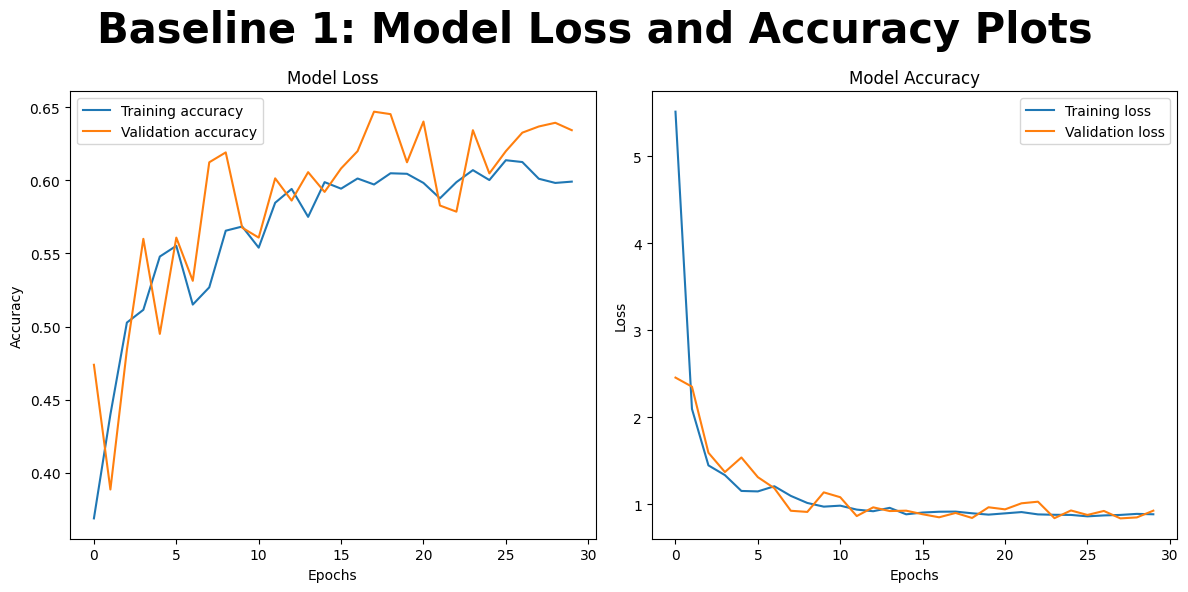

In [ ]:
# Plot the training history
plt.figure(figsize=(12,6))

plt.suptitle("Baseline 1: Model Loss and Accuracy Plots",
           fontsize=30, weight="bold" )

plt.subplot(1,2,1)
plt.plot(history_baseline.history["accuracy"], label="Training accuracy")
plt.plot(history_baseline.history["val_accuracy"], label="Validation accuracy")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_baseline.history["loss"], label="Training loss")
plt.plot(history_baseline.history["val_loss"], label="Validation loss")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

**<u>HOME COMPUTER RESULTS:<u>** Baseline 1

**Validation Results:**<br>
Baseline Model 1 - Final Validation Accuracy: 0.5118243098258972 <br>
Baseline Model 1 - Final Validation Loss: 2.1391661167144775 <br>
 
Baseline Model 1 - Best Validation Accuracy: 0.5861486196517944 <br>
Baseline Model 1 - Best Validation Loss: 2.1391661167144775 <br>

**Test Results:**<br>
Test loss: 2.1117255687713623, Baseline Model 1 - Test Accruacy: 0.5083333253860474 <br>

**Comment:**<br>
With a very simple model for only 2 epochs we are only just over 50% so not much better than a random result. However, this is a very basic CNN with only 2 epochs so it shows big potential 

**<u>COLAB PRO RESULTS:<u>** Baseline 1

**Validation Results:**
    

**Test Results:**

    
**Comment:**

## Baseline Model 2: Improve to a better baseline model.

Now, improve the baseline model from a very simple CNN to a better baseline model

In [ ]:
model_baseline_2 = Sequential()

# Input and first Conv2D layer
model_baseline_2.add(Conv2D(32, (3,3), activation="relu", input_shape=(200, 200, 3)))
model_baseline_2.add(MaxPooling2D(pool_size=(2,2)))

# Second Conv2D layer
model_baseline_2.add(Conv2D(64, (3,3), activation="relu"))
model_baseline_2.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output and add a dropout for regularization
model_baseline_2.add(Flatten())
model_baseline_2.add(Dropout(0.5))

# Add dense layers
model_baseline_2.add(Dense(128, activation="relu"))
model_baseline_2.add(Dense(8, activation="softmax"))

# Compile the model
model_baseline_2.compile(loss="categorical_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])

**NOTE:** Run on Colab Pro: Change Epochs!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
history_baseline_2 = model_baseline_2.fit_generator(
    steps_per_epoch=(train_data_generator.n//train_data_generator.batch_size),
    generator=train_data_generator,
    validation_data=validation_data_generator,
    validation_steps=validation_data_generator.n // validation_data_generator.batch_size,
    epochs= 30, # ONLY 2. INCREASE LATER
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=10),
        # ModelCheckpoint(filepath="best_model_baseline.h5", monitor="val_loss",save_best_only=True)
    ]
)

Epoch 1/30
175/175 [==============================] - 57s 289ms/step - loss: 1.0553 - accuracy: 0.5389 - val_loss: 1.1797 - val_accuracy: 0.5549
Epoch 2/30
175/175 [==============================] - 51s 289ms/step - loss: 0.7857 - accuracy: 0.6350 - val_loss: 0.8013 - val_accuracy: 0.6715
Epoch 3/30
175/175 [==============================] - 51s 292ms/step - loss: 0.7509 - accuracy: 0.6471 - val_loss: 0.7486 - val_accuracy: 0.6706
Epoch 4/30
175/175 [==============================] - 51s 290ms/step - loss: 0.6969 - accuracy: 0.6779 - val_loss: 0.7145 - val_accuracy: 0.6993
Epoch 5/30
175/175 [==============================] - 51s 289ms/step - loss: 0.6646 - accuracy: 0.6880 - val_loss: 0.6784 - val_accuracy: 0.7103
Epoch 6/30
175/175 [==============================] - 51s 289ms/step - loss: 0.6451 - accuracy: 0.7030 - val_loss: 0.6638 - val_accuracy: 0.7154
Epoch 7/30
175/175 [==============================] - 51s 290ms/step - loss: 0.6295 - accuracy: 0.7114 - val_loss: 0.6847 - val_ac

In [ ]:
# final validation and loss accuracy
final_val_accuracy = history_baseline_2.history["val_accuracy"][-1]
print(f"Baseline Model 2 - Final Validation Accuracy: {final_val_accuracy}")

final_val_loss = history_baseline_2.history["val_loss"][-1]
print(f"Baseline Model 2 - Final Validation Loss: {final_val_loss}")

print(" ")

# best validation and loss accuracy
best_val_accuracy = max(history_baseline_2.history["val_accuracy"])
print(f"Baseline Model 2 - Best Validation Accuracy: {best_val_accuracy}")

best_val_loss = min(history_baseline_2.history["val_loss"])
print(f"Baseline Model 2 - Best Validation Loss: {best_val_loss}")

Baseline Model 2 - Final Validation Accuracy: 0.7094594836235046
Baseline Model 2 - Final Validation Loss: 0.6733397245407104
 
Baseline Model 2 - Best Validation Accuracy: 0.7550675868988037
Baseline Model 2 - Best Validation Loss: 0.5815339088439941


In [ ]:
test_loss, test_accuracy = model_baseline_2.evaluate_generator(
    test_data_generator,
    steps= test_data_generator.n // test_data_generator.batch_size)

print(f"Baseline Model 2 - Test loss: {test_loss}, \nBaseline Model 2 - Test Accruacy: {test_accuracy}")

Baseline Model 2 - Test loss: 0.6568202972412109, 
Baseline Model 2 - Test Accruacy: 0.7083333134651184


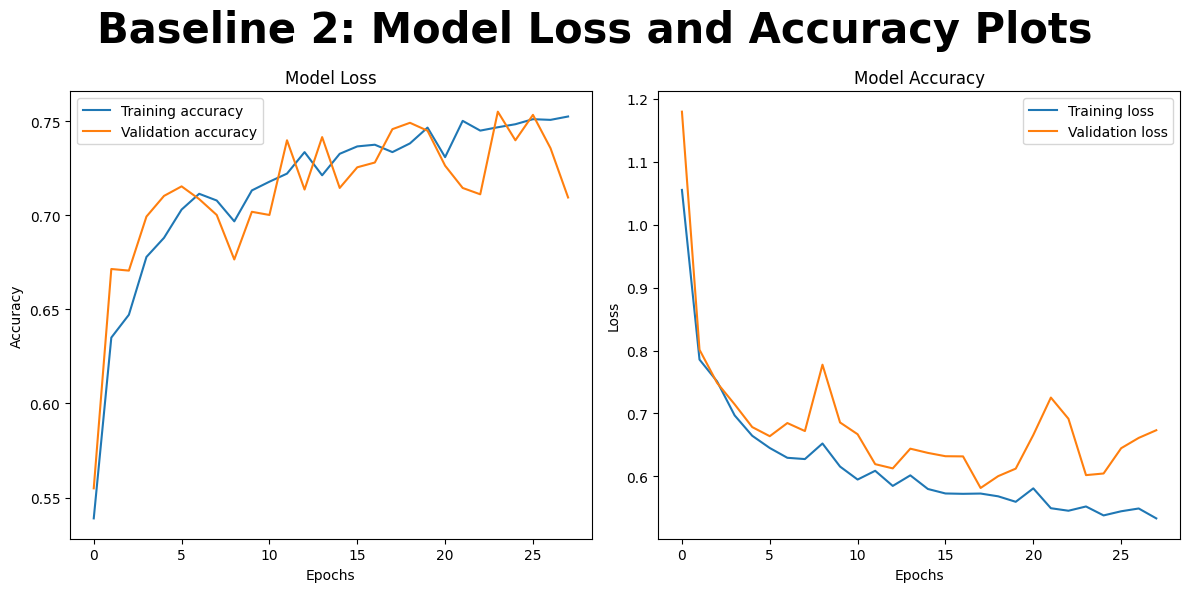

In [ ]:
# Plot the training history
plt.figure(figsize=(12,6))

plt.suptitle("Baseline 2: Model Loss and Accuracy Plots",
           fontsize=30, weight="bold" )

plt.subplot(1,2,1)
plt.plot(history_baseline_2.history["accuracy"], label="Training accuracy")
plt.plot(history_baseline_2.history["val_accuracy"], label="Validation accuracy")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_baseline_2.history["loss"], label="Training loss")
plt.plot(history_baseline_2.history["val_loss"], label="Validation loss")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

**<u>HOME COMPUTER RESULTS:<u>** Baseline 2


**Validation Results:**<br>
Baseline Model 2 - Final Validation Accuracy: 0.6444256901741028 <br>
Baseline Model 2 - Final Validation Loss: 0.8149824142456055 <br>
 
Baseline Model 2 - Best Validation Accuracy: 0.6444256901741028 <br>
Baseline Model 2 - Best Validation Loss: 0.8149824142456055 <br>

**Test Results:**<br>
Baseline Model 2 - Test loss: 0.7628529071807861, <br>
Baseline Model 2 - Test Accruacy: 0.6600000262260437<br>
    
**Comment:**<br>
With a slightly more complex CNN with some more layers we see a big improvement in the train data and also an improvement in the Test Accuracy. The loss also has dropped considerable. Again, for the home computer there are only 2 Epochs so again rally good results for such small improvements and small epochs.

**<u>COLAB PRO RESULTS:<u>** Baseline 2

**Validation Results:**<br>
    

**Test Results:**<br>

    
**Comment:**<br>

# **Change some of the model parameters.**

- e.g. number of layers, number of filters, number of nodes in fully connected layers and show how this effects performance.
- Note best to have a well performing small model.
- Explain also in your own words why the model’s performance changes/does not change and analyse the training curves.

I want to investaige how each aspect can affect the model .....

### Layers

I want to explore how layers can have an effect on models, so I created a function to run though some options and compare the results.

#### Create a function to just change the number of Layers

Create a function that looks at how the number of layers can change the results of a model.

In [ ]:
def create_model_change_layers(num_conv_layers):
    model= Sequential()
    
    # Input and first Conv2D layer
    model.add(Conv2D(32, (3,3), activation="relu", input_shape=(200, 200,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Additonal Conv2D Layers
    # This part will change per input to generate different layers for comparison.
    for i in range(num_conv_layers -1):
        model.add(Conv2D(64, (3,3), activation="relu"))
        model.add(MaxPooling2D(pool_size=(2,2)))
        
    # Flatten output and add dropout for regularization
    model.add(Flatten())
    model.add(Dropout(0.5))
    
    # Dense layers
    model.add(Dense(128, activation="relu"))
    model.add(Dense(8, activation="softmax"))
    
    # Complie the model
    model.compile(loss="categorical_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])
    return model

**NOTE:** Run on Colab Pro: Change Epochs!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
num_epochs = 20 # CHANGE THIS LATER - UP the number of Epochs

# Dictionaries to store history results and test accuracy
layers_histories = {}
layers_test_accuracies = {}

for num_layers in range(1,6): ## CHANGE THIS TO (1,6) FOR COLAB PRO
    # create and compile the model
    model= create_model_change_layers(num_layers)
    
    # Train the model
    history = model.fit_generator(
    train_data_generator,
    validation_data=validation_data_generator,
    epochs= num_epochs,
    verbose=1 )# useful to give some detailed outputs of running models)
        
    # Evaluate the model
    test_lost, test_accurary = model.evaluate_generator(test_data_generator, verbose=0)
    
    # Store bhistory and test accuracy results
    layers_histories[num_layers] = history
    layers_test_accuracies[num_layers] = test_accuracy

    train_loss = history.history["loss"][-1]
    train_accuracy = history.history["accuracy"][-1]
    val_loss = history.history["val_loss"][-1]
    val_accuracy = history.history["val_accuracy"][-1]
    
    print(f" Model with {num_layers} layers - Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")
    print(f" \nValidation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


Epoch 1/20
175/175 [==============================] - 52s 288ms/step - loss: 1.7443 - accuracy: 0.4643 - val_loss: 1.2052 - val_accuracy: 0.5400
Epoch 2/20
175/175 [==============================] - 51s 289ms/step - loss: 0.8987 - accuracy: 0.5966 - val_loss: 0.9467 - val_accuracy: 0.6300
Epoch 3/20
175/175 [==============================] - 51s 289ms/step - loss: 0.8222 - accuracy: 0.6259 - val_loss: 0.8586 - val_accuracy: 0.6417
Epoch 4/20
175/175 [==============================] - 51s 289ms/step - loss: 0.7805 - accuracy: 0.6459 - val_loss: 0.7690 - val_accuracy: 0.6883
Epoch 5/20
175/175 [==============================] - 50s 288ms/step - loss: 0.7540 - accuracy: 0.6538 - val_loss: 1.0829 - val_accuracy: 0.6058
Epoch 6/20
175/175 [==============================] - 51s 289ms/step - loss: 0.7477 - accuracy: 0.6541 - val_loss: 0.8893 - val_accuracy: 0.6492
Epoch 7/20
175/175 [==============================] - 51s 289ms/step - loss: 0.7193 - accuracy: 0.6664 - val_loss: 0.8222 - val_ac

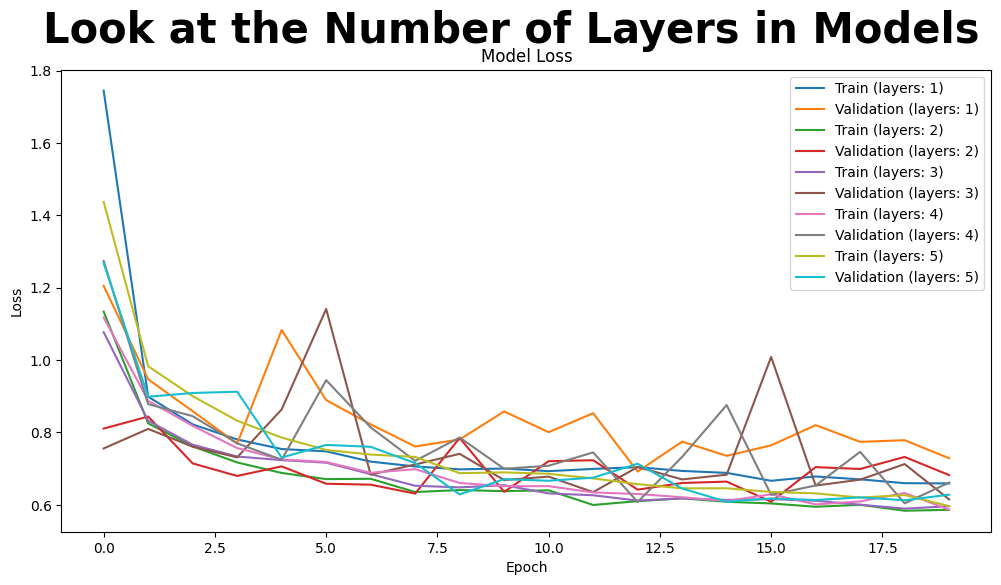

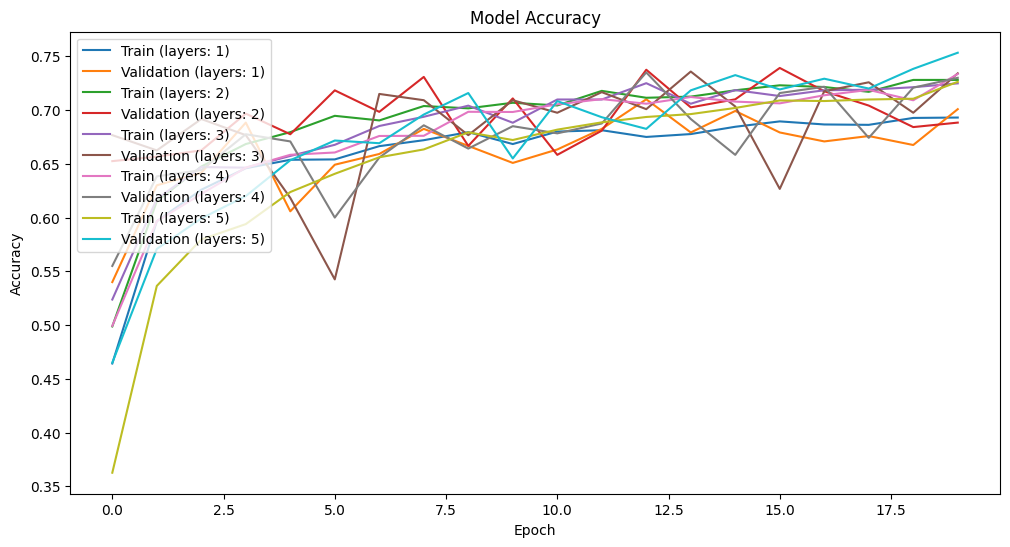

In [ ]:
# plot the loss results
plt.figure(figsize=(12,6))

for num_layers, history in layers_histories.items():
    plt.plot(history.history["loss"], label=f"Train (layers: {num_layers})")
    plt.plot(history.history["val_loss"], label=f"Validation (layers: {num_layers})")

    
plt.suptitle("Look at the Number of Layers in Models",
           fontsize=30, weight="bold" )

plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.show()

# Plot the accurary results
plt.figure(figsize=(12,6))

for num_layers, history in layers_histories.items():
    plt.plot(history.history["accuracy"], label=f"Train (layers: {num_layers})")
    plt.plot(history.history["val_accuracy"], label=f"Validation (layers: {num_layers})")
    
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="upper left")
plt.show()

#### Results:

???

???

First run is layers 1,2 to see if the code works.

???

???


**<u>HOME COMPUTER RESULTS:<u>** ????


**Validation Results:**<br>
    

**Test Results:**<br>

    
**Comment:**<br>

**<u>COLAB PRO RESULTS:<u>** ???

**Validation Results:**<br>
    

**Test Results:**<br>

    
**Comment:**<br>

### Number of filters

#### Create a similiar function that test different filter sizes. 

In [ ]:
def create_model_change_filters(initial_filters):
    model = Sequential()
    
    model.add(Conv2D(initial_filters, (3,3), activation="relu",
                    input_shape=(200,200,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    filters = initial_filters *2
    
    for _ in range(1,5):
        model.add(Conv2D(filters, (3,3), activation="relu"))
        model.add(MaxPooling2D(pool_size=(2,2)))
        filters *= 2
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(8, activation="softmax"))
    
    # Complie the model
    model.compile(loss="categorical_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])
    return model

In [ ]:
num_epochs = 20 # CHANGE THIS LATER

# Dictionaries to store history results and test accuracies
filters_histories = {}
filters_test_accuracies = {}

for initial_filters in [8, 16, 32, 64, 128]: # Add in these filters  32, 64, 128
    # create and compile the model
    model= create_model_change_filters(initial_filters)
    
    # Train the model
    history = model.fit_generator(
        train_data_generator,
        validation_data=validation_data_generator,
        epochs= num_epochs,
        verbose=1 )# useful to give some detailed outputs of running models)
        
    # Evaluate the model
    test_lost, test_accurary = model.evaluate_generator(test_data_generator, verbose=0)
    
    # Store bhistory and test accuracy results
    layers_histories[num_layers] = history
    layers_test_accuracies[num_layers] = test_accuracy

    train_loss = history.history["loss"][-1]
    train_accuracy = history.history["accuracy"][-1]
    val_loss = history.history["val_loss"][-1]
    val_accuracy = history.history["val_accuracy"][-1]
    
    print(f" Model with {num_layers} layers - Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")
    print(f" \nValidation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Epoch 1/20
175/175 [==============================] - 53s 289ms/step - loss: 1.2757 - accuracy: 0.4170 - val_loss: 1.0012 - val_accuracy: 0.5583
Epoch 2/20
175/175 [==============================] - 51s 290ms/step - loss: 0.9414 - accuracy: 0.5545 - val_loss: 0.8382 - val_accuracy: 0.6300
Epoch 3/20
175/175 [==============================] - 51s 289ms/step - loss: 0.8466 - accuracy: 0.5986 - val_loss: 1.0375 - val_accuracy: 0.5758
Epoch 4/20
175/175 [==============================] - 50s 287ms/step - loss: 0.7847 - accuracy: 0.6279 - val_loss: 0.9271 - val_accuracy: 0.5942
Epoch 5/20
175/175 [==============================] - 51s 290ms/step - loss: 0.7643 - accuracy: 0.6379 - val_loss: 0.8371 - val_accuracy: 0.6292
Epoch 6/20
175/175 [==============================] - 50s 288ms/step - loss: 0.7233 - accuracy: 0.6564 - val_loss: 0.7216 - val_accuracy: 0.6600
Epoch 7/20
175/175 [==============================] - 50s 288ms/step - loss: 0.7098 - accuracy: 0.6643 - val_loss: 0.8722 - val_ac

In [ ]:
# # plot the loss results
# plt.figure(figsize=(12,6))

# for initial_filters, history in filters_histories.items():
#     plt.plot(history.history["loss"], label=f"Train (layers: {initial_filters})")
#     plt.plot(history.history["val_loss"], label=f"Validation (layers: {initial_filters})")

    
# plt.suptitle("Look at the Number of Filters in Models",
#            fontsize=30, weight="bold" )

# plt.title("Model Loss")
# plt.ylabel("Loss")
# plt.xlabel("Epoch")
# plt.legend(loc="upper right")
# plt.show()

# # Plot the accurary results
# plt.figure(figsize=(12,6))

# for initial_filters, history in filters_histories.items():
#     plt.plot(history.history["accuracy"], label=f"Train (layers: {initial_filters})")
#     plt.plot(history.history["val_accuracy"], label=f"Validation (layers: {initial_filters})")
    
# plt.title("Model Accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("Epoch")
# plt.legend(loc="upper left")
# plt.show()

#### Results

**<u>HOME COMPUTER RESULTS:<u>** ????


**Validation Results:**<br>
    

**Test Results:**<br>

    
**Comment:**<br>

**<u>COLAB PRO RESULTS:<u>** ???

**Validation Results:**<br>
    

**Test Results:**<br>

    
**Comment:**<br>

### Number of Dense layers

#### Next, we will look at a function that looks at the number of dense layers.

In [ ]:
def create_model_dense_layers(num_dense_layers):
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), activation="relu",
                    input_shape=(200,200,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    
    # add a dense layers
    for i in range(num_dense_layers):
        model.add(Dense(128, activation="relu"))
        
    model.add(Dense(8, activation="softmax"))
    
    # Complie the model
    model.compile(loss="categorical_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])
    return model

In [ ]:
num_epochs = 20 # CHANGE THIS LATER

# Dictionaries to store history results and test accuracies
dense_layers_histories = {}
dense_layers_test_accuracies = {}

for num_dense_layers in range(1,6): # CHANGE TO (1,6)
    # create and compile the model
    model= create_model_dense_layers(num_dense_layers)
    
    # Train the model
    history = model.fit_generator(
        train_data_generator,
        validation_data=validation_data_generator,
        epochs= num_epochs,
        verbose=1 )# useful to give some detailed outputs of running models)
        
    # Evaluate the model
    test_lost, test_accurary = model.evaluate_generator(test_data_generator, verbose=0)
    
  # Store bhistory and test accuracy results
    layers_histories[num_layers] = history
    layers_test_accuracies[num_layers] = test_accuracy

    train_loss = history.history["loss"][-1]
    train_accuracy = history.history["accuracy"][-1]
    val_loss = history.history["val_loss"][-1]
    val_accuracy = history.history["val_accuracy"][-1]
    
    print(f" Model with {num_layers} layers - Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")
    print(f" \nValidation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Epoch 1/20
175/175 [==============================] - 52s 288ms/step - loss: 1.1582 - accuracy: 0.5005 - val_loss: 1.0381 - val_accuracy: 0.5850
Epoch 2/20
175/175 [==============================] - 50s 287ms/step - loss: 0.8392 - accuracy: 0.6112 - val_loss: 0.7749 - val_accuracy: 0.6650
Epoch 3/20
175/175 [==============================] - 50s 286ms/step - loss: 0.7746 - accuracy: 0.6352 - val_loss: 0.7048 - val_accuracy: 0.6900
Epoch 4/20
175/175 [==============================] - 50s 286ms/step - loss: 0.7381 - accuracy: 0.6570 - val_loss: 0.9178 - val_accuracy: 0.6667
Epoch 5/20
175/175 [==============================] - 50s 288ms/step - loss: 0.7310 - accuracy: 0.6580 - val_loss: 0.6971 - val_accuracy: 0.7108
Epoch 6/20
175/175 [==============================] - 50s 286ms/step - loss: 0.7185 - accuracy: 0.6661 - val_loss: 0.7273 - val_accuracy: 0.6708
Epoch 7/20
175/175 [==============================] - 50s 286ms/step - loss: 0.6768 - accuracy: 0.6913 - val_loss: 0.6967 - val_ac

NameError: ignored

In [ ]:
# # plot the loss results
# plt.figure(figsize=(12,6))

# for num_dense_layers, history in dense_layers_histories.items():
#     plt.plot(history.history["loss"], label=f"Train (layers: {num_dense_layers})")
#     plt.plot(history.history["val_loss"], label=f"Validation (layers: {num_dense_layers})")

    
# plt.suptitle("Look at the Number of Dense Layers in Models",
#            fontsize=30, weight="bold" )

# plt.title("Model Loss")
# plt.ylabel("Loss")
# plt.xlabel("Epoch")
# plt.legend(loc="upper right")
# plt.show()

# # Plot the accurary results
# plt.figure(figsize=(12,6))

# for num_dense_layers, history in dense_layers_histories.items():
#     plt.plot(history.history["accuracy"], label=f"Train (layers: {num_dense_layers})")
#     plt.plot(history.history["val_accuracy"], label=f"Validation (layers: {num_dense_layers})")
    
# plt.title("Model Accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("Epoch")
# plt.legend(loc="upper left")
# plt.show()

#### Results

### Number of nodes

#### Create a function to explore how nodes change can affect results.

In [ ]:
def create_model_change_nodes(num_nodes):
    model = Sequential()
    
    # input the first conv2D layer
    model.add(Conv2D(32, (3,3), activation="relu",
                    input_shape=(200,200,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Second Cov2D layer
    model.add(Conv2D(32, (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Flatten the output and add a dropout for regularization
    model.add(Flatten())
    model.add(Dropout(0.5))
    
    # add dense layers with the specified number of nodes
    model.add(Dense(num_nodes, activation="relu"))
    model.add(Dense(8, activation="softmax"))
    
    # Complie the model
    model.compile(loss="categorical_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])
    return model

In [ ]:
num_epochs = 10 # CHANGE THIS LATER

# Dictionaries to store history results and test accuracies
nodes_histories = {}
nodes_test_accuracies = {}

for num_nodes in range(64, 256, 64): # CHANGE TO 64, 128, 256, 321, 512 nodes - change 128 to 321
    # create and compile the model
    model= create_model_change_nodes(num_nodes)
    
    # Train the model
    history = model.fit_generator(
        train_data_generator,
        validation_data=validation_data_generator,
        epochs= num_epochs,
        verbose=1 )# useful to give some detailed outputs of running models)
        
    # Evaluate the model
    test_lost, test_accuracy = model.evaluate_generator(test_data_generator, verbose=0)
    
    # Store bhistory and test accuracy results
    nodes_histories[num_nodes ] = history
    nodes_test_accuracies[num_nodes ] = test_accuracy

    train_loss = history.history["loss"][-1]
    train_accuracy = history.history["accuracy"][-1]
    val_loss = history.history["val_loss"][-1]
    val_accuracy = history.history["val_accuracy"][-1]
    
    print(f" Model with {num_nodes } layers - Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")
    print(f" \nValidation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Epoch 1/10
175/175 [==============================] - 61s 287ms/step - loss: 1.2398 - accuracy: 0.4634 - val_loss: 1.0359 - val_accuracy: 0.5908
Epoch 2/10
175/175 [==============================] - 50s 288ms/step - loss: 0.8486 - accuracy: 0.6154 - val_loss: 0.8127 - val_accuracy: 0.6333
Epoch 3/10
175/175 [==============================] - 50s 287ms/step - loss: 0.7970 - accuracy: 0.6418 - val_loss: 0.7300 - val_accuracy: 0.6817
Epoch 4/10
175/175 [==============================] - 50s 286ms/step - loss: 0.7509 - accuracy: 0.6518 - val_loss: 0.8080 - val_accuracy: 0.6708
Epoch 5/10
175/175 [==============================] - 50s 288ms/step - loss: 0.7265 - accuracy: 0.6630 - val_loss: 0.7889 - val_accuracy: 0.6617
Epoch 6/10
175/175 [==============================] - 50s 286ms/step - loss: 0.7011 - accuracy: 0.6750 - val_loss: 0.7713 - val_accuracy: 0.6800
Epoch 7/10
175/175 [==============================] - 51s 289ms/step - loss: 0.7052 - accuracy: 0.6784 - val_loss: 0.7251 - val_ac

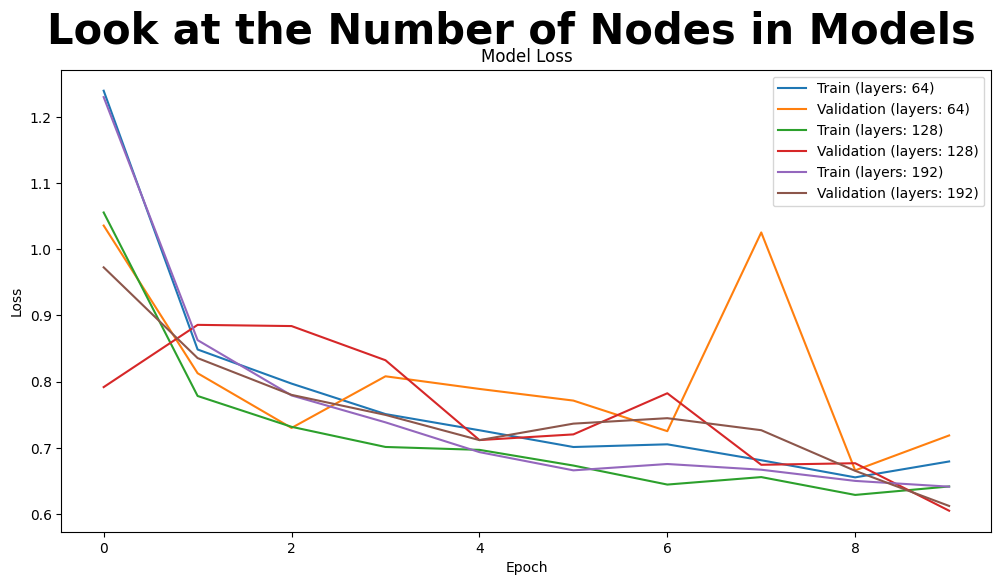

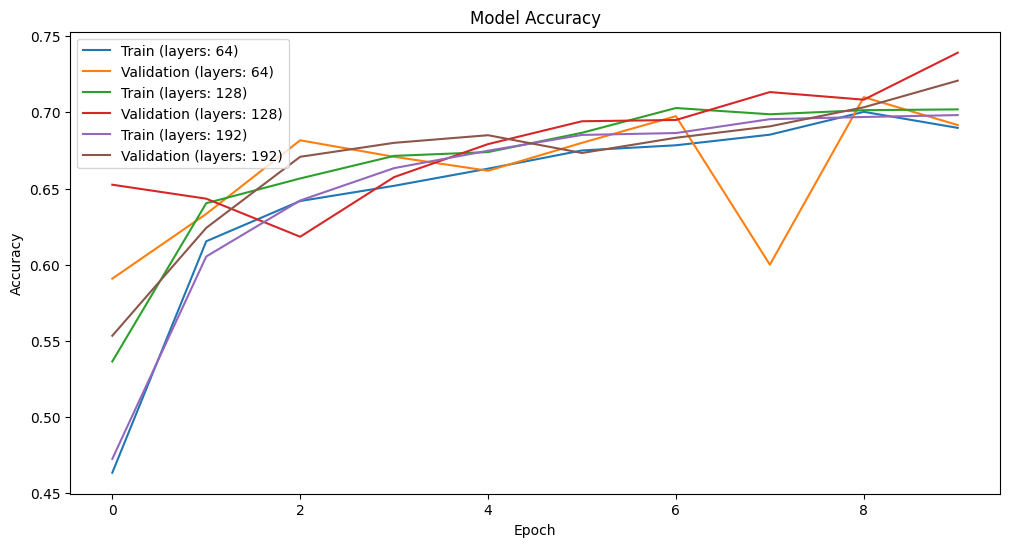

In [ ]:
# plot the loss results
plt.figure(figsize=(12,6))

for num_nodes, history in nodes_histories.items():
    plt.plot(history.history["loss"], label=f"Train (layers: {num_nodes})")
    plt.plot(history.history["val_loss"], label=f"Validation (layers: {num_nodes})")

    
plt.suptitle("Look at the Number of Nodes in Models",
           fontsize=30, weight="bold" )

plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.show()

# Plot the accurary results
plt.figure(figsize=(12,6))

for num_nodes, history in nodes_histories.items():
    plt.plot(history.history["accuracy"], label=f"Train (layers: {num_nodes})")
    plt.plot(history.history["val_accuracy"], label=f"Validation (layers: {num_nodes})")
    
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="upper left")
plt.show()

#### Results

### Run a function that will test a range of layers, nodes, dense layers and filters to find the best paramaters.

We have seen how each element has an affect when different values are ran.

Next, we will look at one function that will ..........

#### Create a function to explore how each of the options can work together to improve results.

In [ ]:
def create_combined_model(num_conv_layers, num_filters, num_dense_layers, num_nodes):
    model = Sequential()
    
    # Input a first Conv2D layer
    model.add(Conv2D(num_filters, (3,3), activation="relu", input_shape=(200,200,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    filters = num_filters *2
    
    for _ in range(1, num_conv_layers):
        model.add(Conv2D(filters, (3,3), activation="relu"))  
        model.add(MaxPooling2D(pool_size=(2,2)))
        filters *=2
        
    model.add(Flatten())
    model.add(Dropout(0.5))
    
    nodes = num_nodes
    for _ in range(num_dense_layers):
        model.add(Dense(nodes, activation="relu"))
        nodes //= 2
        
    model.add(Dense(8, activation="softmax"))
    
    # COmplile the model
    model.compile(loss="categorical_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])
    return model

created a nested for loop to look for the best paramaters.

In [ ]:
def find_best_hyperparameters():
    
    num_epochs = 3
        
    best_accuracy =0
    best_hyperparameters = None
    
    for num_conv_layers in range(1,5):
        for num_filters in [16, 32, 64,128]: # Need more filters later
            for num_dense_layers in range(1,5): # Need to add more range
                for num_nodes in [64,128, 256]: # and more nodes
                    
                    model = create_combined_model(num_conv_layers, num_filters, num_dense_layers, num_nodes)
                    
                    # Train the model
                    history = model.fit_generator(
                        train_data_generator,
                        validation_data= validation_data_generator,
                        epochs=num_epochs,
                        verbose=1)
                    
                    # Evaluate the model
                    test_loss, test_accuracy = model.evaluate_generator(test_data_generator, verbose=0)
                    
                    print(f"Model with {num_conv_layers} conv layers, {num_filters} initial filters, "
                          f"{num_dense_layers} dense layers, {num_nodes} nodes - Test Accuracy: {test_accuracy}")
                    
                    if test_accuracy > best_accuracy:
                        best_accuracy = test_accuracy
                        best_hyperparameters = (num_conv_layers, num_filters, num_dense_layers, num_nodes)
                        
    return best_hyperparameters, best_accuracy

best_hyperparameters, best_accuracy = find_best_hyperparameters()

best_num_conv_layers, best_num_filters, best_num_dense_layers, best_num_nodes = best_hyperparameters


print(f"Best hyperparameters:")
print(f"Number of convolutional layers: {best_num_conv_layers}")
print(f"Initial Number of filters: {best_num_filters}")
print(f"Number of dense layers: {best_num_dense_layers}")
print(f"Number of nodes in dense layers: {best_num_nodes}")
print(f"Best test accuracy: {best_accuracy}")
      

Epoch 1/3
175/175 [==============================] - 52s 288ms/step - loss: 1.7694 - accuracy: 0.4087 - val_loss: 0.9949 - val_accuracy: 0.5625
Epoch 2/3
175/175 [==============================] - 50s 284ms/step - loss: 0.8973 - accuracy: 0.5832 - val_loss: 0.8771 - val_accuracy: 0.6175
Epoch 3/3
175/175 [==============================] - 50s 286ms/step - loss: 0.8449 - accuracy: 0.6118 - val_loss: 0.8553 - val_accuracy: 0.6308
Model with 1 conv layers, 16 initial filters, 1 dense layers, 64 nodes - Test Accuracy: 0.6600000262260437
Epoch 1/3
175/175 [==============================] - 51s 284ms/step - loss: 1.2283 - accuracy: 0.5527 - val_loss: 0.9264 - val_accuracy: 0.6008
Epoch 2/3
175/175 [==============================] - 50s 285ms/step - loss: 0.8232 - accuracy: 0.6191 - val_loss: 0.9253 - val_accuracy: 0.6175
Epoch 3/3
175/175 [==============================] - 50s 285ms/step - loss: 0.7848 - accuracy: 0.6346 - val_loss: 0.8621 - val_accuracy: 0.6500
Model with 1 conv layers, 16 

**Run 1: Best hyperparameters:** <br>
Number of convolutional layers: 4 <br>
Initial Number of filters: 32 <br>
Number of dense layers: 1 <br>
Number of nodes in dense layers: 64 <br>
Best test accuracy: 65.1% <br>

**Run 2: Best hyperparameters:** <br>
Number of convolutional layers: 3 <br>
Initial Number of filters: 16 <br>
Number of dense layers: 1 <br>
Number of nodes in dense layers: 64 <br>
Best test accuracy: 67% <br>

**Run 2: Best hyperparameters:** <br>
Number of convolutional layers: 2 <br>
Initial Number of filters: 128 <br>
Number of dense layers: 1 <br>
Number of nodes in dense layers: 256 <br>
Best test accuracy: 72.1 <br>

#### Results

# **Complex. Change your model and analyse the new results and training curves using one or more concepts; give an intuitive understanding of the concepts; suggestions on concepts are:**

### 5.a) Transfer learning

Transfer Learning is a technique in NN and DP where a pre-trained model is fine tuned to solve a different but related problem. The idea is to leverage the knowledge gained from solving one task to improve the performance on another task.

In Transfer Learning, a neural network is first trained on a large dataset such as Image Net for image classification tasks. This pre trained model has already learned many useful features and patterns already. These learned features can then be used on a new task like ours. We are taking other weights to help train our model better.

Some steps:
1. **Select a pre-trained model**. Get a NN architecture that has been trained on a large dataset.
2. **Remove the last layer**. You don't want the final classification layers as these are specific to the orgional task
3. **Add New layers**. Add new layers to the model to use it to the new task.
4. **Fine Tune the model**. Train the model on the new dataset.

Good for small data as it helps to prevent overfitting by using the knowledge from the pre-trained model. It also reduces training time and computional resources.


NOTE: Can I use the weights from the first model or is it randomised?

#### Choose Pre-Trained model.

In [ ]:
# from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

#### Load the Pre- trained model without the top layers

In [ ]:
# base_model = MobileNetV2(weights="imagenet", 
#                          include_top=False,
#                         input_shape=(200,200,3))

#### Add new layers

In [ ]:
# # Add new layers
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation = "relu")(x)
# x = Dropout(0.5)(x)
# predictions = Dense(8, activation="softmax")(x)

# # Create final model
# model_mobilenetv2 = Model(inputs=base_model.input, outputs= predictions)

#### Fine tune the model

In [ ]:
# for layer in base_model.layers:
#     layer.trainable =False

#### Compile Model

In [ ]:
# model_mobilenetv2.compile(loss="categorical_crossentropy",
#                       optimizer="adam",
#                       metrics=["accuracy"])

#### Train Model

In [ ]:
# history_mobilenetv2 = model_mobilenetv2.fit_generator(
#     steps_per_epoch=(train_data_generator.n//train_data_generator.batch_size),
#     generator=train_data_generator,
#     validation_data=validation_data_generator,
#     validation_steps=validation_data_generator.n // validation_data_generator.batch_size,
#     epochs= 5, # ONLY 5. INCREASE LATER
#     callbacks=[
#         EarlyStopping(monitor="val_loss", patience=10),
#         ModelCheckpoint(filepath="best_model_baseline.h5",
#                        monitor="val_loss",
#                        save_best_only=True)
#     ]
# )

In [ ]:
# # final validation accuracy
# final_val_accuracy = history_mobilenetv2.history["val_accuracy"][-1]
# print(f"history_mobilenetv2 - Final Validaion Accuracy: {final_val_accuracy}")

# best_val_accuracy = max(history_mobilenetv2.history["val_accuracy"])
# print(f"history_mobilenetv2 - Best Validation Accuracy: {best_val_accuracy}")

In [ ]:
# test_loss, test_accuracy = model_mobilenetv2.evaluate_generator(
#     test_data_generator,
#     steps=test_data_generator.n // test_data_generator.batch_size,
#     verbose=1
# )

# print(f"Test Loss: {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")

### 5.b) Effect of resizing the image

" Effect of resizing the image" with NN is the impact of changing the dimensions of input images and the effect it can have on the performance and characteristics of a NN. 

Resizing images is a common preprocessing step in computer vision tasks. 

Things to consider:
1. **Computational Complexitiy**: Making images smaller can reduce the need for computer resources such as CPU and Memory. This can lead to faster training times and lower computer hardware resources usage. But it can also result in lower resolution images which can reduce a models performance.

2. **Aspect Ratio**: If you resize its important to avoid distortion. Distorted images can reduce a models performance.

3. **Features Preservation**: If you reduce the size of an image you can lose important features which can affect a models performance. If you increase the size of an image, this could improve a models performance but this would also increase computational complexity.

4. **Model Architecture**: You need to match architectures if you use pre-trained models such as VGG or ResNet.

In [ ]:
# #### Set Image SIze
# image_sizes = [(100,100), (150,150), (200,200), (250,250), (300,300)]

In [ ]:
# val_accuracies = {}

# for target_size in image_sizes:
#     print(f"Image size: {target_size}")
          
#     train_data_generator= train_dataAugmentation.flow_from_directory(
#                                         train_folder,
#                                         target_size=target_size, 
#                                         color_mode='rgb',
#                                         batch_size=32,
#                                         class_mode='categorical',
#                                         shuffle=True)

#     validation_data_generator = test_dataAugmentation.flow_from_directory(
#                                         val_folder,
#                                         target_size=target_size,
#                                         batch_size=32,
#                                         class_mode="categorical")


#     test_data_generator =test_dataAugmentation.flow_from_directory(
#                                         test_folder,
#                                         target_size=target_size,
#                                         batch_size=50,
#                                         class_mode='categorical')
    
#     # ?????
#     # CHANGE THE name of the model to include "resizing"
    
#     # Train the model
#     history_mobilenetv2 = model_mobilenetv2.fit_generator(
#         steps_per_epoch=(train_data_generator.n//train_data_generator.batch_size),
#         generator=train_data_generator,
#         validation_data=validation_data_generator,
#         validation_steps=validation_data_generator.n // validation_data_generator.batch_size,
#         epochs= 2, # ONLY 5. INCREASE LATER
#         callbacks=[
#             EarlyStopping(monitor="val_loss", patience=10),
#             ModelCheckpoint(filepath="best_model_baseline.h5",
#                            monitor="val_loss",
#                            save_best_only=True)])
        
#     # Get the valiation accuary
#     val_accuracy = max(history_mobilenetv2.history["val_accuracy"])
        
#     # Store the validation accuracy with the image size
#     val_accuracies[target_size] = val_accuracy
        
# # find the best image size based on the highest validation accuracy
# best_image_size = max(val_accuracies, key=val_accuracies.get)
# best_val_accuracy = val_accuracies[best_image_size]
        
# print(f"Best image size: {best_image_size}")
# print(f"Best validation accuracy: {best_val_accuracy}")      

Best image size: (200, 200)

Best validation accuracy: 0.82421875

In [ ]:
# # Evaluate the model on the test data
# test_loss, test_accuracy = model_mobilenetv2.evaluate_generator(test_data_generator)

# print(f"Test accuracy: {test_accuracy}")

In [ ]:
# test_loss, test_accuracy = model_mobilenetv2.evaluate_generator(
#     test_data_generator,
#     steps=test_data_generator.n // test_data_generator.batch_size,
#     verbose=1
# )

# print(f"Test Loss: {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")

#### Add top layers - COME BACK TO THIS

Change the model names- ???????????????

In [ ]:
# for target_size in image_sizes:
#     print(f"Image size: {target_size}")
          
#     train_data_generator= train_dataAugmentation.flow_from_directory(
#                                         train_folder,
#                                         target_size=target_size, 
#                                         color_mode='rgb',
#                                         batch_size=32,
#                                         class_mode='categorical',
#                                         shuffle=True)

#     validation_data_generator = test_dataAugmentation.flow_from_directory(
#                                         val_folder,
#                                         target_size=target_size,
#                                         batch_size=32,
#                                         class_mode="categorical")


#     test_data_generator =test_dataAugmentation.flow_from_directory(
#                                         test_folder,
#                                         target_size=target_size,
#                                         batch_size=50,
#                                         class_mode='categorical')
    
#     # load the mobileNetV2 model without top layers
#     base_model = MobileNetV2(input_shape=target_size + (3,), include_top=False, weights='imagenet')
    
#     # add layers
#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(1024, activation="relu")(x)
#     predictions = Dense(8, activation="softmax")(x)
    
#     # Create and compile model
#     model_mobilenetv2_resizing = Model(inputs=base_model.input, outputs=predictions)
#     model_mobilenetv2_resizing.compile(optimizer="adam", 
#                                        loss="categorical_crossentropy", 
#                                        metrics=["accuracy"])
    
#     # Train the model
#     history_mobilenetv2 = model_mobilenetv2.fit_generator(
#         steps_per_epoch=(train_data_generator.n//train_data_generator.batch_size),
#         generator=train_data_generator,
#         validation_data=validation_data_generator,
#         validation_steps=validation_data_generator.n // validation_data_generator.batch_size,
#         epochs= 2, # ONLY 5. INCREASE LATER
#         callbacks=[
#             EarlyStopping(monitor="val_loss", patience=10),
#             ModelCheckpoint(filepath="best_model_baseline.h5",
#                            monitor="val_loss",
#                            save_best_only=True)])
    
#     # Get the valiation accuary
#     val_accuracy = max(history_mobilenetv2.history["val_accuracy"])
        
#     # Store the validation accuracy with the image size
#     val_accuracies[target_size] = val_accuracy
        
# # find the best image size based on the highest validation accuracy
# best_image_size = max(val_accuracies, key=val_accuracies.get)
# best_val_accuracy = val_accuracies[best_image_size]
        
# print(f"Best image size: {best_image_size}")
# print(f"Best validation accuracy: {best_val_accuracy}")

Best image size: (200, 200)

Best validation accuracy: 0.8359375

In [ ]:
# # Evaluate the model on the test data
# test_loss, test_accuracy = model_mobilenetv2.evaluate_generator(test_data_generator)

# print(f"Test accuracy: {test_accuracy}")

In [ ]:
# test_loss, test_accuracy = model_mobilenetv2.evaluate_generator(
#     test_data_generator,
#     steps=test_data_generator.n // test_data_generator.batch_size,
#     verbose=1
# )

# print(f"Test Loss: {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")

WAHT IS THE TOP LAYER- ADD to report.

### 5.c) Using the following paper as a reference, https://arxiv.org/pdf/2201.03545.pdf, can you implement 2-3 changes to see if this improves performance. Mixup and cutmix are options here.

#### Mixup

In order to use Mixup data augmnetation we need to create a custom data generator that uses Mixup to the images.

In [ ]:
# def mixup_data(x, y, alpha=0.4):
    
#     x_l = l.reshape(-1,1,1,1)
#     y_l = l.reshape(-1,1)
#     index = np.random.permutation(x.shape[0])
    
#     x_mixup = x * x_l + x[index] * (1 - x_l)
#     y_mixup = y * y_l + y[index] * (1 - y_l)
    
#     return x_mixup, y_mixup  

In [ ]:
# def mixup_generator(generator, alpha=0.4):
#     batch_x, batch_y = next(generator)
#     batch_x_mixup, batch_y_mixup = mixup_data(batch_x, batch_y, alpha)
#     yield batch_x_mixup, batch_y_mixup

Can now create a Mixup generator of the training data

In [ ]:
# train_mixup_generator = mixup_generator(train_data_generator, alpha=0.4)

In [ ]:
# # Train the model: model_mobilenetv2_mixup
# history_mobilenetv2_mixup = model_mobilenetv2_mixup.fit_generator(
#     steps_per_epoch=(train_data_generator.n//train_data_generator.batch_size),
#     generator=mixup_generator,
#     validation_data=validation_data_generator,
#     validation_steps=validation_data_generator.n // validation_data_generator.batch_size,
#     epochs= 2, # ONLY 5. INCREASE LATER
#     callbacks=[
#         EarlyStopping(monitor="val_loss", patience=10),
#         ModelCheckpoint(filepath="best_model_mobilenetv2_mixup.h5",
#                             monitor="val_loss",
#                            save_best_only=True)])